In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sys
sns.set()

### Simulated Annealing Model for Minimization problem

In [2]:
class simulated_annealing():
    def __init__(self,global_iter=500,local_iter=50,initial_temp=10000,alpha= 0.9,step_size =0.1,retries=5):
        
        self.gloab_iter = global_iter          # No of Iteration for Temperature change
        self.local_iter = local_iter           # No of Iteration for accepting/rejecting solution in neighbourhood
        self.initial_temp = initial_temp       # Initial Temperature
        self.alpha = alpha                     # Factor for decreasing the Temperature
        self.step_size = step_size             # steps size for finding new solution
        self.retries = retries                 #  no of retries for finding feasible solution
        return
    
    # function for setting objective function 
    def set_cost_func (self,obj_func,no_of_var,lower_bound=-1,upper_bound=1):
        self.cost_func = obj_func              # objective function which needs to be minimized
        self.no_of_var = no_of_var             # No of decision variable in objective function 
        self.lower_bound = lower_bound         # lower bound for generating initial random solution
        self.upper_bound = upper_bound         # upper bound for generating initial random solution
        return
    
    # function for evaluting objective function value
    def get_cost(self,solution):
        return self.cost_func(solution)
    
    # function for setting constraint for objective function
    def set_constraint(self,func):
        self.constraint_func = func
        return
    
    # function for checking if the given solution is feasible for not
    def is_feasible(self,solution):
        return self.constraint_func(solution)
    
    # function for generating initial random solution
    def initial_solution(self,):
        retries = self.retries                 # no of retry for finding feasible solution
        found_feasible = False
        
        # generate feasible solution while retries are not exhausted
        while (retries > 0):
            retries = self.retries -1
            
            # genrate random solution from uniform distribution between lower and upper bound
            current_solution = np.random.uniform(self.lower_bound,self.upper_bound,size=self.no_of_var)
            if self.is_feasible(current_solution):
                found_feasible = True
                break
        if not found_feasible:
            print('Error: unable to generate initial feasible solution')
            sys.exit()
        return current_solution

    # function for generating new candidate feasible solution from current solution
    def get_neighbours(self,solution):
        retries = self.retries               # no of retry for finding feasible solution
        found_feasible = False
        
        # generate feasible solution while retries are not exhausted
        while(retries > 0):
            retries = self.retries -1
            
            # generate random number between 0 to 1
            step_direction = np.random.rand(self.no_of_var) 
            
            # if value is grater than 0.5 then add the step size else subtract the step size
            pos_idx = step_direction >= 0.5
            step_direction[pos_idx]= step_direction[pos_idx]  *  self.step_size 
            step_direction[~pos_idx] = step_direction[~pos_idx] * self.step_size * -1
            neighbours = np.copy(solution)
            neighbours = solution + step_direction
            if self.is_feasible(neighbours):
                found_feasible = True
                break
        if not found_feasible:
            print('Error: unable to generate initial neighbouring soltutions')
            sys.exit()
        return neighbours

    # function for checking accpetance/rejection probability
    def accept_prob(self,new_cost,current_cost,temp):
        prob = 1/(np.exp((new_cost - current_cost)/temp))
        return prob

    # simulted annealing optimizing algorithm implementation
    def optimize(self,random_state=42):
        temp = self.initial_temp 
        np.random.seed(random_state)
        self.temperatures = []
        self.cost_values = []
        current_solution = self.initial_solution()
        current_cost = self.get_cost(current_solution)
        for global_iter in range(self.gloab_iter):
            for local_iter in range(self.local_iter):
                candidate_solution =  self.get_neighbours(current_solution)
                candidate_cost = self.get_cost(candidate_solution)
                if candidate_cost <= current_cost:
                    current_solution = candidate_solution
                    current_cost = candidate_cost 
                else:
                    accept_prob = self.accept_prob(candidate_cost,current_cost,temp)
                    rand_num = np.random.rand()
                    if rand_num <= accept_prob:
                        current_solution = candidate_solution
                        current_cost = candidate_cost
            self.temperatures.append(temp)
            self.cost_values.append(current_cost)
            temp = temp * self.alpha
        print("Optimum solution is {} which occurs at {}".format(current_cost,current_solution))
        return 

## Testing for Unconstrained Optimization

#### Test function : Himmelblau's function
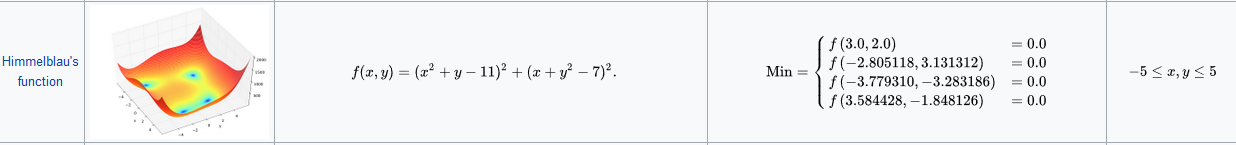

In [3]:
# Himmelblau's function
def obj_func(arg):
    x,y = arg
    obj_val_current = ((x**2)+y-11)**2+(x+(y**2)-7)**2
    return obj_val_current

# constraint 
def constraint(arg):
    x,y = arg
    # search domain
    condition = (x >= -5) and (x <= 5) and (y >= -5) and (y <= 5)
    return condition

In [4]:
# Solution 1
optimizer = simulated_annealing()
optimizer.set_cost_func(obj_func,2,-5,5)
optimizer.set_constraint(constraint)
optimizer.optimize()

Optimum solution is 0.01089140748663971 which occurs at [2.99012631 1.98423938]


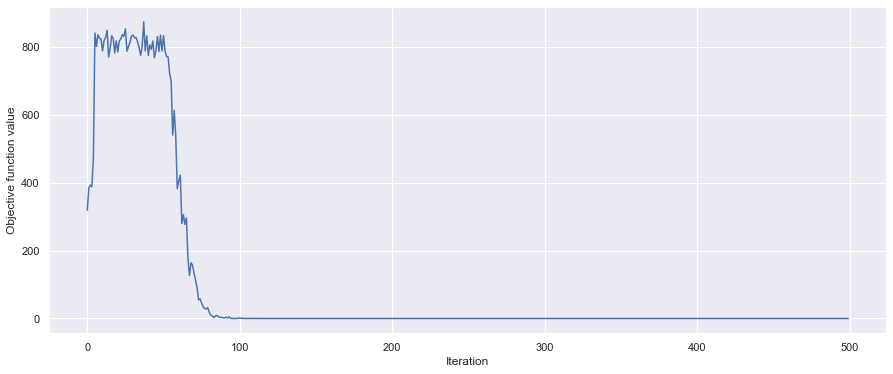

In [5]:
plt.figure(figsize=(15,6))
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.plot(range(optimizer.gloab_iter),optimizer.cost_values)

## Testing for constrained Optimization

#### Test function Rosenbrock function constrained with a cubic and a line
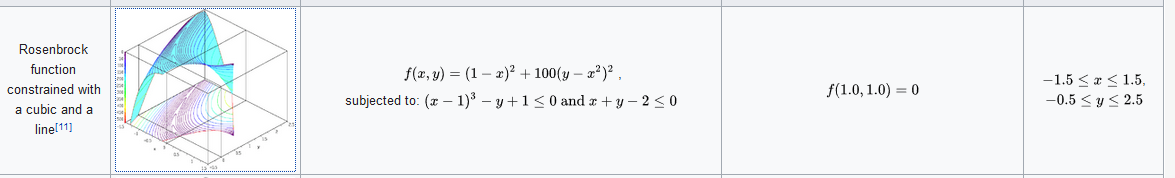

In [6]:
# Rosenbrock function
def obj_func(arg):
    x,y = arg
    obj_val_current = (1-x)**2 + 100*(y-x**2)**2
    return obj_val_current

# constraint 
def constraint(*args):
    x,y = args[0]
    condition_1 = (x-1)**3 -y+1 <=0
    condition_2 = x+y-2 <= 0
    condition_3 = (x >= -1.5) and (x <= 1.5) and (y >= -0.5) and (y <= 2.5)
    
    final = condition_1 and condition_2 and condition_3
    return final

In [7]:
# Solution 1
optimizer = simulated_annealing(global_iter=1000,step_size =0.05)
optimizer.set_cost_func(obj_func,2,-1,1)
optimizer.set_constraint(constraint)
optimizer.optimize()

Optimum solution is 0.005417077712028723 which occurs at [0.99632573 1.00001586]


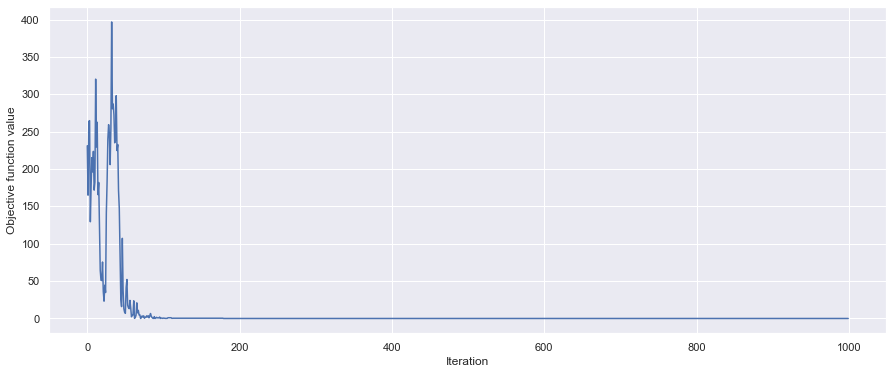

In [8]:
plt.figure(figsize=(15,6))
plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.plot(range(optimizer.gloab_iter),optimizer.cost_values)